## TOPIC : MOBILE PRICE CLASSIFICATION

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
data_train = pd.read_csv("E:\\ML\\train.csv")
data_test = pd.read_csv("E:\\ML\\test.csv")
print(data_train.head(10))
print(data_test.head(10))

   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   
5           1859     0          0.5         1   3       0          22    0.7   
6           1821     0          1.7         0   4       1          10    0.8   
7           1954     0          0.5         1   0       0          24    0.8   
8           1445     1          0.5         0   0       0          53    0.7   
9            509     1          0.6         1   2       1           9    0.1   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20  

# Exploratory Data Analysis

In [9]:
data_train.shape  #rows and columns.

(2000, 21)

In [10]:
data_test.shape

(1000, 21)

In [11]:
data_train.info()   # A method to check null values, type of values .

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [12]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [49]:
data_train.describe()    # To describe the statistical information.

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [50]:
data_test.describe()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,...,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,288.819436,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,...,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,1.000000,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,...,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,250.750000,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,...,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,500.500000,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,...,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,750.250000,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,...,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1000.000000,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,...,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


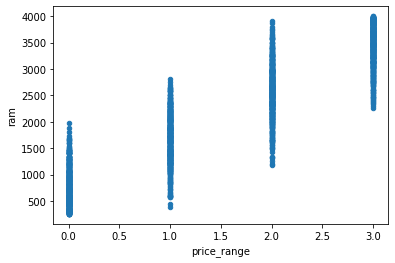

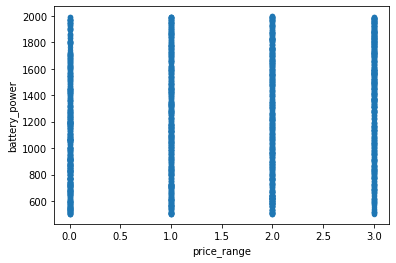

In [51]:
data_train.plot(x='price_range',y='ram',kind='scatter') # Plotting an attribute with respect to price range.
plt.show()
data_train.plot(x='price_range',y='battery_power',kind='scatter')
plt.show()

In [52]:
data_train.isnull().sum()  # Another method of checking Null Values.

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [53]:
data_test.isnull().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [54]:
data_train['price_range'].value_counts()  # Counting the distinct values as well as total rows of distinct values.

0    500
1    500
2    500
3    500
Name: price_range, dtype: int64

e:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'TARGET DISTRIBUTION')

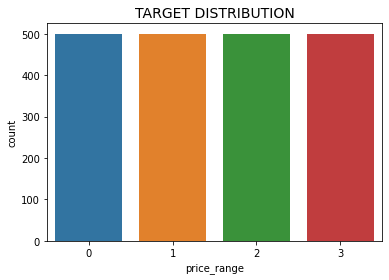

In [55]:
sns.countplot(data_train['price_range'])
plt.title("TARGET DISTRIBUTION",fontsize=14)

# Normalisation


In [14]:
data_test = data_test.drop('id',axis=1)

In [15]:
data_test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [16]:
y=data_train['price_range']   #Storing target class in other dataframe
y.head(10)

0    1
1    2
2    2
3    2
4    1
5    1
6    3
7    0
8    0
9    0
Name: price_range, dtype: int64

In [17]:
X=data_train.drop('price_range',axis=1) # Dropping the target class from dataset because we do not need to normalise the target class.
X.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [18]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
X_std = std.fit_transform(X)
print(X_std)
data_test_std = std.transform(data_test)

[[-0.90259726 -0.9900495   0.83077942 ... -1.78686097 -1.00601811
   0.98609664]
 [-0.49513857  1.0100505  -1.2530642  ...  0.55964063  0.99401789
  -1.01409939]
 [-1.5376865   1.0100505  -1.2530642  ...  0.55964063  0.99401789
  -1.01409939]
 ...
 [ 1.53077336 -0.9900495  -0.76274805 ...  0.55964063  0.99401789
  -1.01409939]
 [ 0.62252745 -0.9900495  -0.76274805 ...  0.55964063  0.99401789
   0.98609664]
 [-1.65833069  1.0100505   0.58562134 ...  0.55964063  0.99401789
   0.98609664]]


In [19]:
data_test_std

array([[-0.44505984,  1.0100505 ,  0.34046327, ..., -1.78686097,
         0.99401789, -1.01409939],
       [-0.90487356,  1.0100505 , -1.2530642 , ...,  0.55964063,
        -1.00601811, -1.01409939],
       [ 1.29403758,  1.0100505 ,  1.56625363, ..., -1.78686097,
         0.99401789,  0.98609664],
       ...,
       [-0.12182446, -0.9900495 , -0.14985287, ...,  0.55964063,
        -1.00601811, -1.01409939],
       [ 0.67032987,  1.0100505 , -1.2530642 , ..., -1.78686097,
         0.99401789, -1.01409939],
       [ 0.07166151,  1.0100505 , -1.2530642 , ...,  0.55964063,
        -1.00601811,  0.98609664]])

# Training The Model

# 1) Decision Tree Classifier

In [20]:
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set (# 70% training and 30% test)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [69]:
# Build decision tree model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [70]:
y_pred = dt.predict(X_test)
print(y_pred)

[0 1 1 0 2 1 1 2 2 3 0 3 1 1 3 0 0 1 1 1 3 3 1 2 3 2 2 3 1 2 1 1 2 0 3 3 1
 0 0 1 1 1 3 1 0 1 2 2 1 2 1 3 1 3 1 3 1 3 3 1 0 2 1 2 2 1 0 2 3 2 1 2 0 3
 3 1 2 1 1 0 0 3 1 2 3 2 2 1 1 1 3 0 1 1 1 3 3 0 3 3 3 3 0 1 2 0 0 1 0 2 0
 3 1 1 2 2 3 1 1 1 1 0 0 0 3 1 1 1 0 1 0 2 0 3 2 0 3 2 1 1 0 0 2 1 0 2 0 1
 0 1 3 3 1 1 0 1 1 1 3 1 3 1 3 2 3 1 2 1 3 2 2 0 2 2 0 3 3 0 1 2 0 3 1 0 2
 3 3 1 2 1 2 2 2 2 1 1 2 3 3 1 3 2 0 1 2 2 2 1 0 2 0 2 2 0 3 0 1 0 3 1 0 2
 2 1 3 3 1 3 1 1 0 2 3 3 2 1 0 1 2 2 3 2 1 2 0 1 2 0 3 3 3 1 2 1 0 2 1 3 2
 0 3 1 1 1 2 1 2 0 3 2 2 0 0 2 2 3 0 1 1 2 3 1 2 2 2 0 0 3 0 0 1 3 2 3 0 0
 1 3 3 3 2 2 0 0 3 0 1 0 0 0 3 1 2 1 0 2 3 1 3 3 3 1 1 1 2 1 1 0 3 3 3 1 1
 0 1 2 3 2 0 3 3 2 2 2 2 2 3 3 3 2 1 3 1 0 3 1 3 2 3 2 3 0 3 0 1 1 2 3 0 0
 2 3 1 0 3 3 3 0 2 2 1 3 3 3 3 0 3 2 0 0 3 2 2 0 2 2 3 3 1 0 1 0 0 0 0 1 3
 1 1 3 0 1 1 3 3 2 2 3 3 3 3 2 0 0 3 1 1 2 1 1 1 0 3 1 1 1 0 0 2 2 0 3 3 2
 1 3 0 2 3 0 3 3 1 1 2 0 2 1 3 2 0 1 0 2 0 3 2 2 0 1 0 2 2 2 1 2 1 1 1 2 0
 2 1 1 3 1 3 2 2 0 2 2 2 

In [71]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [72]:
#Evaluating Model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
import itertools
tp,fn,fp,tn=confusion_matrix(y_pred,y_test,labels=[1,0]).reshape(-1)
print('Outcome values : \n',tp,fn,fp,tn)

Outcome values : 
 129 16 9 119


Classification Report : 
               precision    recall  f1-score   support

           1       0.87      0.78      0.82       165
           0       0.88      0.93      0.90       128

   micro avg       0.87      0.85      0.86       293
   macro avg       0.87      0.86      0.86       293
weighted avg       0.87      0.85      0.86       293

Accuracy:   0.867
Confusion matrix, without normalization


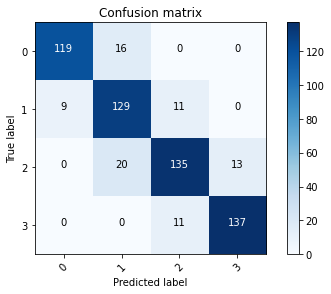

In [73]:
matrix=classification_report(y_pred,y_test,labels=[1,0])
print('Classification Report : \n',matrix)
score = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm,classes=['0','1','2','3'])

# 2) KNN

In [74]:
# We need to perform Standard Scaler for KNN because here distance matters between two points.
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)
X_train_std

array([[ 0.12296692, -1.00142959,  1.58033471, ..., -1.73867435,
         0.98722446,  1.00286124],
       [ 0.6169352 , -1.00142959,  1.70309277, ..., -1.73867435,
         0.98722446,  1.00286124],
       [-0.21936458,  0.99857245,  1.45757665, ...,  0.57515083,
         0.98722446, -0.99714693],
       ...,
       [-1.2118962 ,  0.99857245,  0.10723794, ...,  0.57515083,
         0.98722446,  1.00286124],
       [ 0.63761294,  0.99857245,  0.35275407, ...,  0.57515083,
         0.98722446, -0.99714693],
       [ 0.63531542,  0.99857245, -0.99758464, ...,  0.57515083,
        -1.01294087,  1.00286124]])

In [75]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train_std,y_train)

KNeighborsClassifier()

In [76]:
y_pred1 = knn.predict(X_test_std)
print(y_pred1)

[0 1 1 0 1 1 0 2 1 3 0 3 2 0 2 0 1 1 1 2 1 2 1 3 3 2 2 1 1 3 1 1 2 0 3 1 0
 0 1 1 0 1 2 0 0 0 1 2 0 2 0 1 0 2 1 3 0 2 2 0 0 3 0 2 0 2 1 2 3 2 1 3 0 3
 2 1 3 0 1 0 0 3 0 1 3 2 2 0 2 0 1 0 0 1 0 2 2 0 1 1 2 3 0 0 2 0 0 1 1 0 0
 3 2 1 1 0 1 0 1 1 1 0 0 0 3 1 1 0 1 1 0 2 0 2 2 1 2 2 1 2 1 1 3 0 0 2 0 1
 0 0 2 3 1 1 0 0 1 0 2 1 2 0 2 2 3 0 3 2 3 1 1 0 1 0 1 3 2 0 0 3 0 3 0 2 1
 3 3 1 1 1 2 1 2 3 0 2 1 3 2 0 3 2 0 3 2 0 1 0 0 1 1 2 2 0 1 0 1 0 3 1 2 2
 2 2 2 1 0 3 2 1 0 1 3 3 1 1 0 1 2 0 3 2 0 1 0 2 1 0 2 2 2 0 0 1 1 1 1 2 1
 0 1 0 1 2 2 2 2 0 1 0 3 0 1 2 2 3 0 1 1 2 3 1 1 0 2 1 1 2 0 0 1 3 1 3 1 0
 1 3 2 3 0 3 0 1 1 0 3 0 1 0 1 1 2 0 0 1 3 2 2 2 3 0 2 1 2 0 0 0 3 2 3 0 1
 0 1 2 1 2 2 3 3 0 2 2 0 3 2 3 3 3 1 3 0 0 1 2 2 2 1 1 2 1 2 0 1 0 1 3 0 1
 1 1 2 1 1 3 2 0 3 1 1 2 3 3 3 0 3 0 0 2 3 2 3 0 1 2 3 3 2 0 0 0 0 0 1 1 2
 1 3 1 0 1 1 3 2 1 3 3 3 2 1 2 0 1 2 0 2 3 1 1 0 0 2 0 0 1 1 1 3 1 1 3 3 3
 0 3 0 2 2 0 0 1 1 0 1 0 2 1 3 2 0 0 0 1 0 3 2 2 0 2 0 3 1 1 1 3 2 2 1 1 0
 1 2 0 3 2 3 1 1 2 1 2 2 

In [77]:
tp,fn,fp,tn=confusion_matrix(y_pred1,y_test,labels=[1,0]).reshape(-1)
print('Outcome values : \n',tp,fn,fp,tn)

Outcome values : 
 60 33 58 98


Classification Report : 
               precision    recall  f1-score   support

           1       0.40      0.34      0.37       176
           0       0.73      0.55      0.62       179

   micro avg       0.56      0.45      0.49       355
   macro avg       0.56      0.44      0.50       355
weighted avg       0.57      0.45      0.50       355

Accuracy:   0.488
Confusion matrix, without normalization


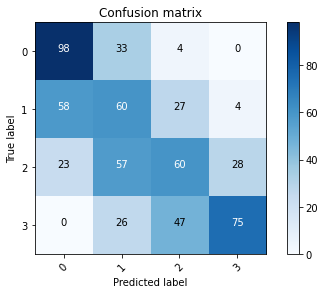

In [78]:
matrix=classification_report(y_pred1,y_test,labels=[1,0])
print('Classification Report : \n',matrix)
score1 = metrics.accuracy_score(y_test, y_pred1)
print("Accuracy:   %0.3f" % score1)
cm = metrics.confusion_matrix(y_test,y_pred1)
plot_confusion_matrix(cm,classes=['0','1','2','3'])

# 3) Logistic Regression

In [79]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train_std,y_train)

LogisticRegression()

In [80]:
y_pred2 = lr.predict(X_test_std)
print(y_pred2)

[0 0 1 1 3 2 0 2 2 3 0 3 1 1 3 0 0 1 1 1 3 3 1 2 3 2 2 3 2 2 2 1 2 0 3 3 0
 0 0 0 2 1 2 1 0 1 2 2 1 2 1 3 1 3 1 3 1 2 3 1 0 2 0 3 2 1 1 2 3 2 1 1 0 3
 3 1 2 1 0 0 0 3 1 2 3 2 2 0 1 1 3 0 1 1 2 3 3 0 3 3 3 3 0 1 2 0 0 1 0 2 0
 3 1 1 2 2 3 1 2 1 2 0 0 0 3 0 1 1 0 1 0 2 0 3 3 0 3 2 2 1 0 0 3 1 0 2 0 0
 0 1 3 3 2 1 0 2 1 0 3 1 3 1 2 2 3 1 2 2 3 2 2 0 2 2 0 3 3 0 0 3 0 3 0 0 2
 3 3 1 2 1 2 3 2 2 0 1 2 3 3 1 3 2 0 1 2 2 2 1 0 2 0 3 2 0 2 0 1 0 2 1 0 1
 2 1 3 3 0 3 2 1 0 2 3 3 2 1 0 1 3 2 3 2 1 1 0 1 3 0 3 3 3 1 2 1 0 1 1 3 2
 0 3 1 1 1 2 1 2 0 3 2 2 0 0 1 3 3 0 1 1 2 3 2 1 2 2 0 0 3 0 0 1 3 2 3 0 0
 1 2 3 2 2 2 0 0 3 1 1 0 0 0 3 1 2 1 0 2 3 2 3 3 3 1 1 1 2 1 1 0 3 3 3 1 1
 0 1 2 3 2 0 3 3 2 3 2 1 2 3 2 3 2 1 3 1 0 3 1 3 2 2 2 3 0 2 0 1 1 2 3 0 0
 2 2 1 0 3 3 3 0 2 2 2 3 3 3 3 0 3 2 0 1 3 2 2 0 2 2 3 3 1 0 1 0 0 0 1 1 3
 1 1 3 0 1 1 3 3 2 2 3 3 3 3 3 0 1 3 1 2 2 1 1 1 0 2 2 1 1 0 0 3 2 0 3 3 2
 1 3 0 2 3 0 2 3 1 0 2 0 2 0 3 2 0 1 0 2 0 3 2 2 0 1 0 1 1 2 1 2 1 0 1 2 0
 2 0 1 3 1 3 2 2 0 2 1 2 

In [81]:
tp,fn,fp,tn=confusion_matrix(y_pred2,y_test,labels=[1,0]).reshape(-1)
print('Outcome values : \n',tp,fn,fp,tn)

Outcome values : 
 137 2 6 133


Classification Report : 
               precision    recall  f1-score   support

           1       0.92      0.93      0.93       147
           0       0.99      0.96      0.97       139

   micro avg       0.95      0.94      0.95       286
   macro avg       0.95      0.94      0.95       286
weighted avg       0.95      0.94      0.95       286

Accuracy:   0.935
Confusion matrix, without normalization


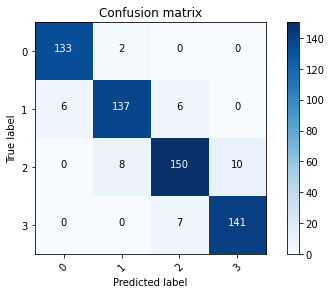

In [82]:
matrix=classification_report(y_pred2,y_test,labels=[1,0])
print('Classification Report : \n',matrix)
score2 = metrics.accuracy_score(y_test, y_pred2)
print("Accuracy:   %0.3f" % score2)
cm = metrics.confusion_matrix(y_test,y_pred2)
plot_confusion_matrix(cm,classes=['0','1','2','3'])

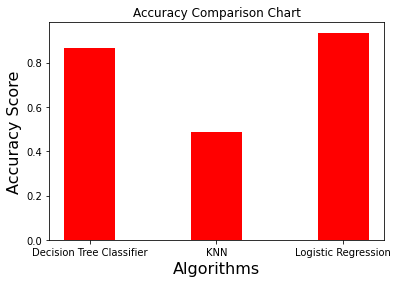

In [85]:
algorithms=['Decision Tree Classifier','KNN','Logistic Regression']
accuracy_score=[score,score1,score2]
plt.bar(algorithms,accuracy_score,color='red',width=0.4)
plt.title('Accuracy Comparison Chart')
plt.xlabel('Algorithms',fontsize=16)
plt.ylabel('Accuracy Score',fontsize=16)
plt.show()